<h2>Importing Nessecary Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
from random import randint

from matplotlib import pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import hashlib

import tensorflow as tf

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch.multiprocessing as mp
mp.set_start_method('spawn', force=True)

from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time


import copy
from concurrent.futures import ThreadPoolExecutor, as_completed

from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.Random import get_random_bytes
import pickle

from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP

key = RSA.generate(2048)
public_key = key.publickey()
cipher_rsa = PKCS1_OAEP.new(key)

symmetric_key = get_random_bytes(16)


C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<h2>Load the data source into the notebook</h2>

In [2]:
# reads in the data from the csv file to the dataframe
df = pd.read_csv("TransactionData/credit_card_transactions.csv", nrows=100000)
# displays the first 10 rows of the dataframe
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


<h2>Exploratory Data Analysis</h2>

In [3]:
# show info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             100000 non-null  int64  
 1   trans_date_trans_time  100000 non-null  object 
 2   cc_num                 100000 non-null  int64  
 3   merchant               100000 non-null  object 
 4   category               100000 non-null  object 
 5   amt                    100000 non-null  float64
 6   first                  100000 non-null  object 
 7   last                   100000 non-null  object 
 8   gender                 100000 non-null  object 
 9   street                 100000 non-null  object 
 10  city                   100000 non-null  object 
 11  state                  100000 non-null  object 
 12  zip                    100000 non-null  int64  
 13  lat                    100000 non-null  float64
 14  long                   100000 non-nul

In [4]:
# loop through a list of columns
for column in ['merchant', 'category', 'city', 'state', 'gender', 'is_fraud']:
    # convert column to type category
    df[column] = df[column].astype('category')
    
# drop unnamed column
df = df.drop(columns=['Unnamed: 0'])
# drop rows with missing data
df = df.dropna()

# show info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84670 entries, 0 to 99998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   trans_date_trans_time  84670 non-null  object  
 1   cc_num                 84670 non-null  int64   
 2   merchant               84670 non-null  category
 3   category               84670 non-null  category
 4   amt                    84670 non-null  float64 
 5   first                  84670 non-null  object  
 6   last                   84670 non-null  object  
 7   gender                 84670 non-null  category
 8   street                 84670 non-null  object  
 9   city                   84670 non-null  category
 10  state                  84670 non-null  category
 11  zip                    84670 non-null  int64   
 12  lat                    84670 non-null  float64 
 13  long                   84670 non-null  float64 
 14  city_pop               84670 non-null  int6

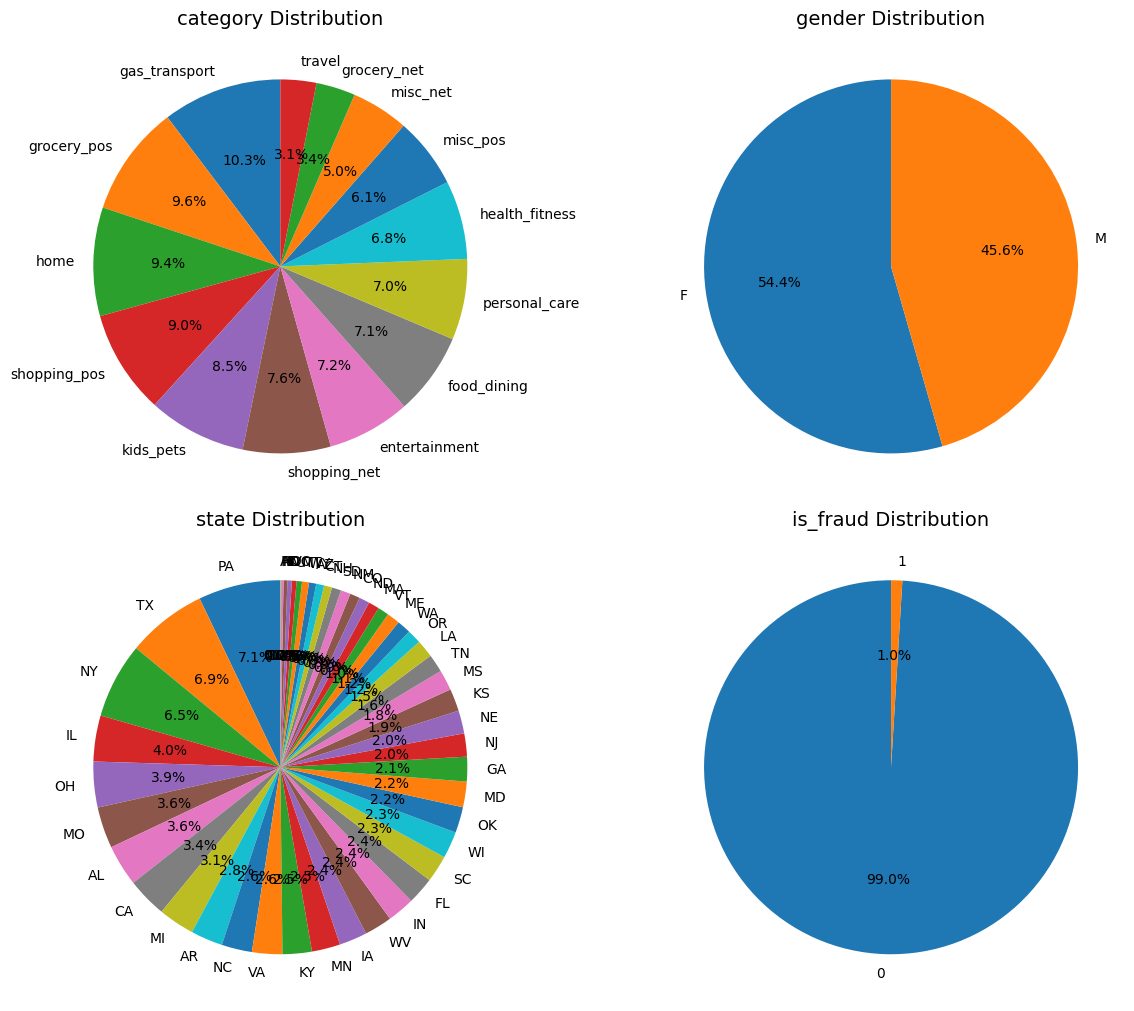

In [5]:
# identify the columns with the datatype category
categorical_cols = df.select_dtypes(include='category').columns.tolist()

# remove merchant and city
categorical_cols.remove('merchant')
categorical_cols.remove('city')

# number of categorical columns
n = len(categorical_cols)
# number of columns of plots
cols = 2 
# number of rows of plots 
rows = math.ceil(n / cols)
# create the figure and the axis
fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows), constrained_layout=True)
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    # gets the value count of that column
    counts = df[col].value_counts()
    # creats the piechart subplot
    axs[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    # sets the title for the subplot
    axs[i].set_title(f'{col} Distribution', fontsize=14)

# hides the axis of the subplot
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# shows the plot
plt.show()

C:\Users\fredd\AppData\Local\Temp\ipykernel_30024\2786002458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=order, palette='Set2')
C:\Users\fredd\AppData\Local\Temp\ipykernel_30024\2786002458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=order, palette='Set2')
C:\Users\fredd\AppData\Local\Temp\ipykernel_30024\2786002458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=order, palette='Set2')
C:\Users\fredd\AppData\Local\Temp\ipykernel_30

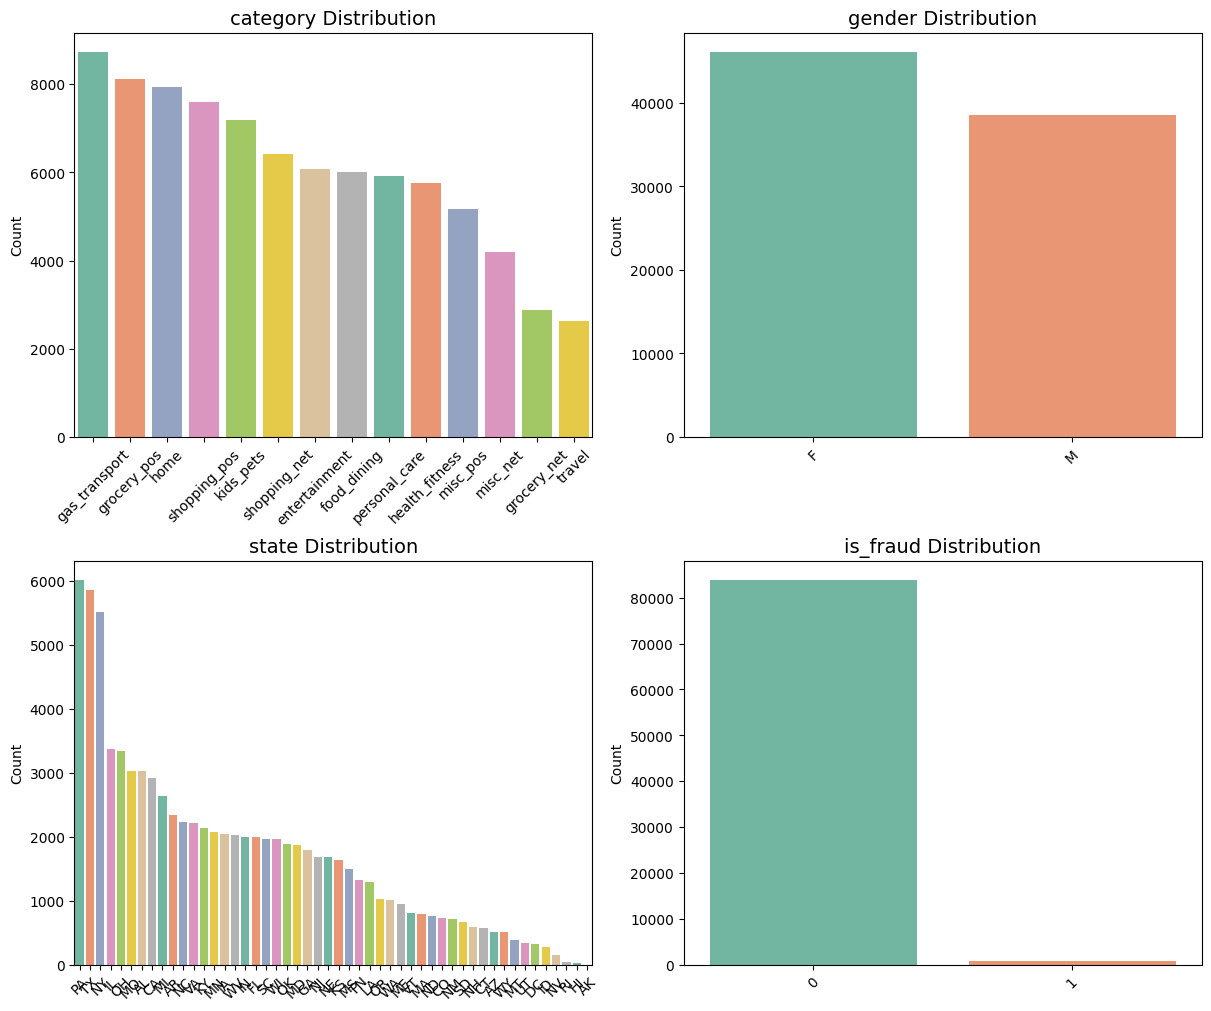

In [6]:
# create the main plot
fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows), constrained_layout=True)
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    # used to plot bar grpah
    ax = axs[i]
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, ax=ax, order=order, palette='Set2')
    # set title
    ax.set_title(f'{col} Distribution', fontsize=14)
    # set x label
    ax.set_xlabel('')
    # set y label
    ax.set_ylabel('Count')
    # set the prameters of the plot
    ax.tick_params(axis='x', rotation=45)

# make sure axis dont show
for j in range(i + 1, len(axs)):
    axs[j].axis('off')
    
# show the plot
plt.show()

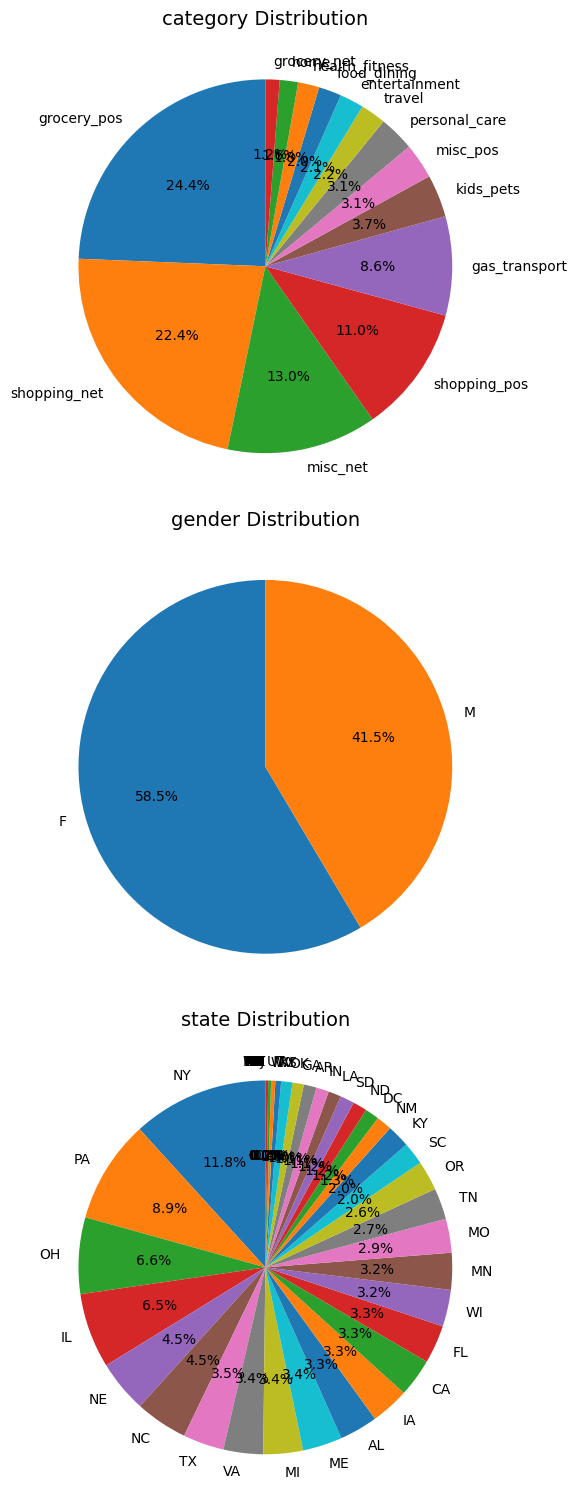

In [7]:
# get rows where fraud is true
fraud_df = df[df['is_fraud'] == 1]

# select categorical columns
categorical_cols = fraud_df.select_dtypes(include='category').columns.tolist()

# remove columns from the categorical columns list
categorical_cols.remove('merchant')
categorical_cols.remove('city')
categorical_cols.remove('is_fraud')

# number of categorical columns
n = len(categorical_cols)
# number of columns for plots
cols = 1 
# number of rows for plots 
rows = math.ceil(n / cols)

# set the main plot
fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows), constrained_layout=True)
axs = axs.flatten()

# loop through the columns
for i, col in enumerate(categorical_cols):
    # count the number of fraud transactions
    counts = fraud_df[col].value_counts()
    # plot pie chart
    axs[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    # set title of pie chart
    axs[i].set_title(f'{col} Distribution', fontsize=14)

# turn axis off the plots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# show the plots
plt.show()

C:\Users\fredd\AppData\Local\Temp\ipykernel_30024\2893066448.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=order, palette='Set2')
C:\Users\fredd\AppData\Local\Temp\ipykernel_30024\2893066448.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=order, palette='Set2')
C:\Users\fredd\AppData\Local\Temp\ipykernel_30024\2893066448.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=order, palette='Set2')


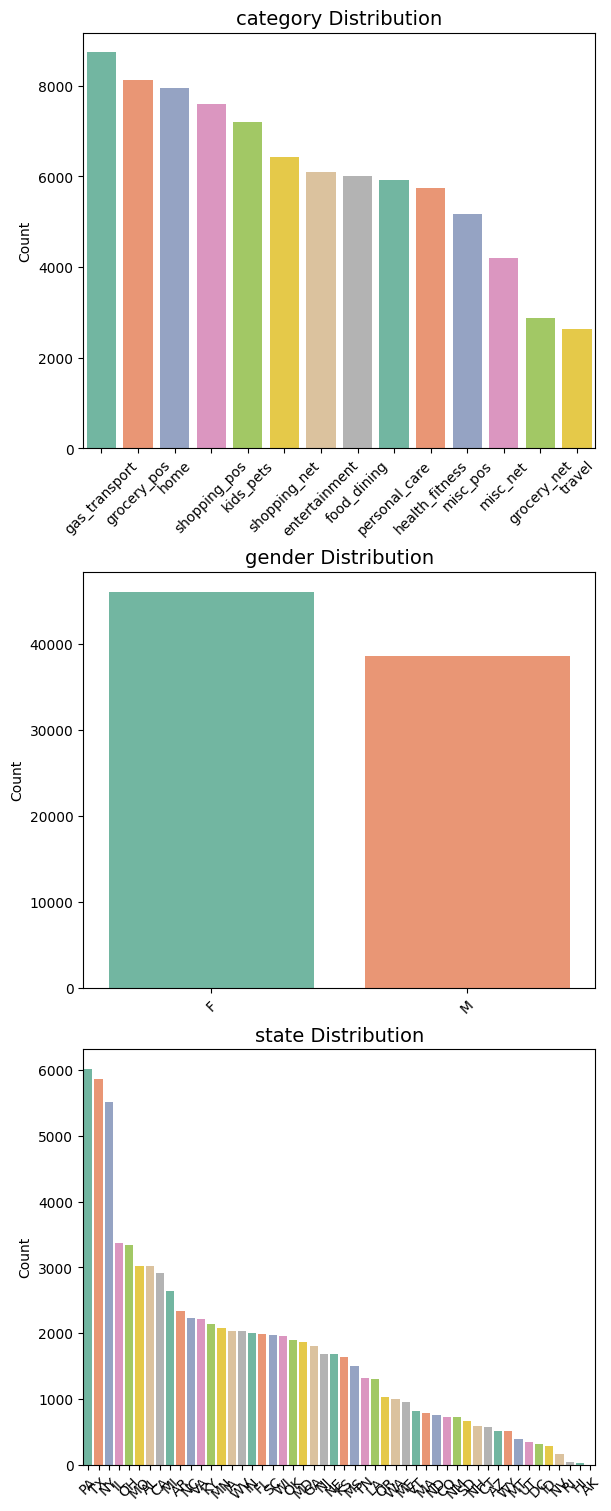

In [8]:
# number of categorical columns
n = len(categorical_cols)
# number of columns for subplots
cols = 1
# number of rows for subplots
rows = math.ceil(n / cols)

# create the main plot
fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows), constrained_layout=True)
axs = axs.flatten()

# loop through the columns
for i, col in enumerate(categorical_cols):
    ax = axs[i]
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, ax=ax, order=order, palette='Set2')
    # set plot title
    ax.set_title(f'{col} Distribution', fontsize=14)
    # set plot x label
    ax.set_xlabel('')
    # set plot y label
    ax.set_ylabel('Count')
    # set the tick parameters for the plot
    ax.tick_params(axis='x', rotation=45)

# turn axis off for plots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')
    
# show plots
plt.show()

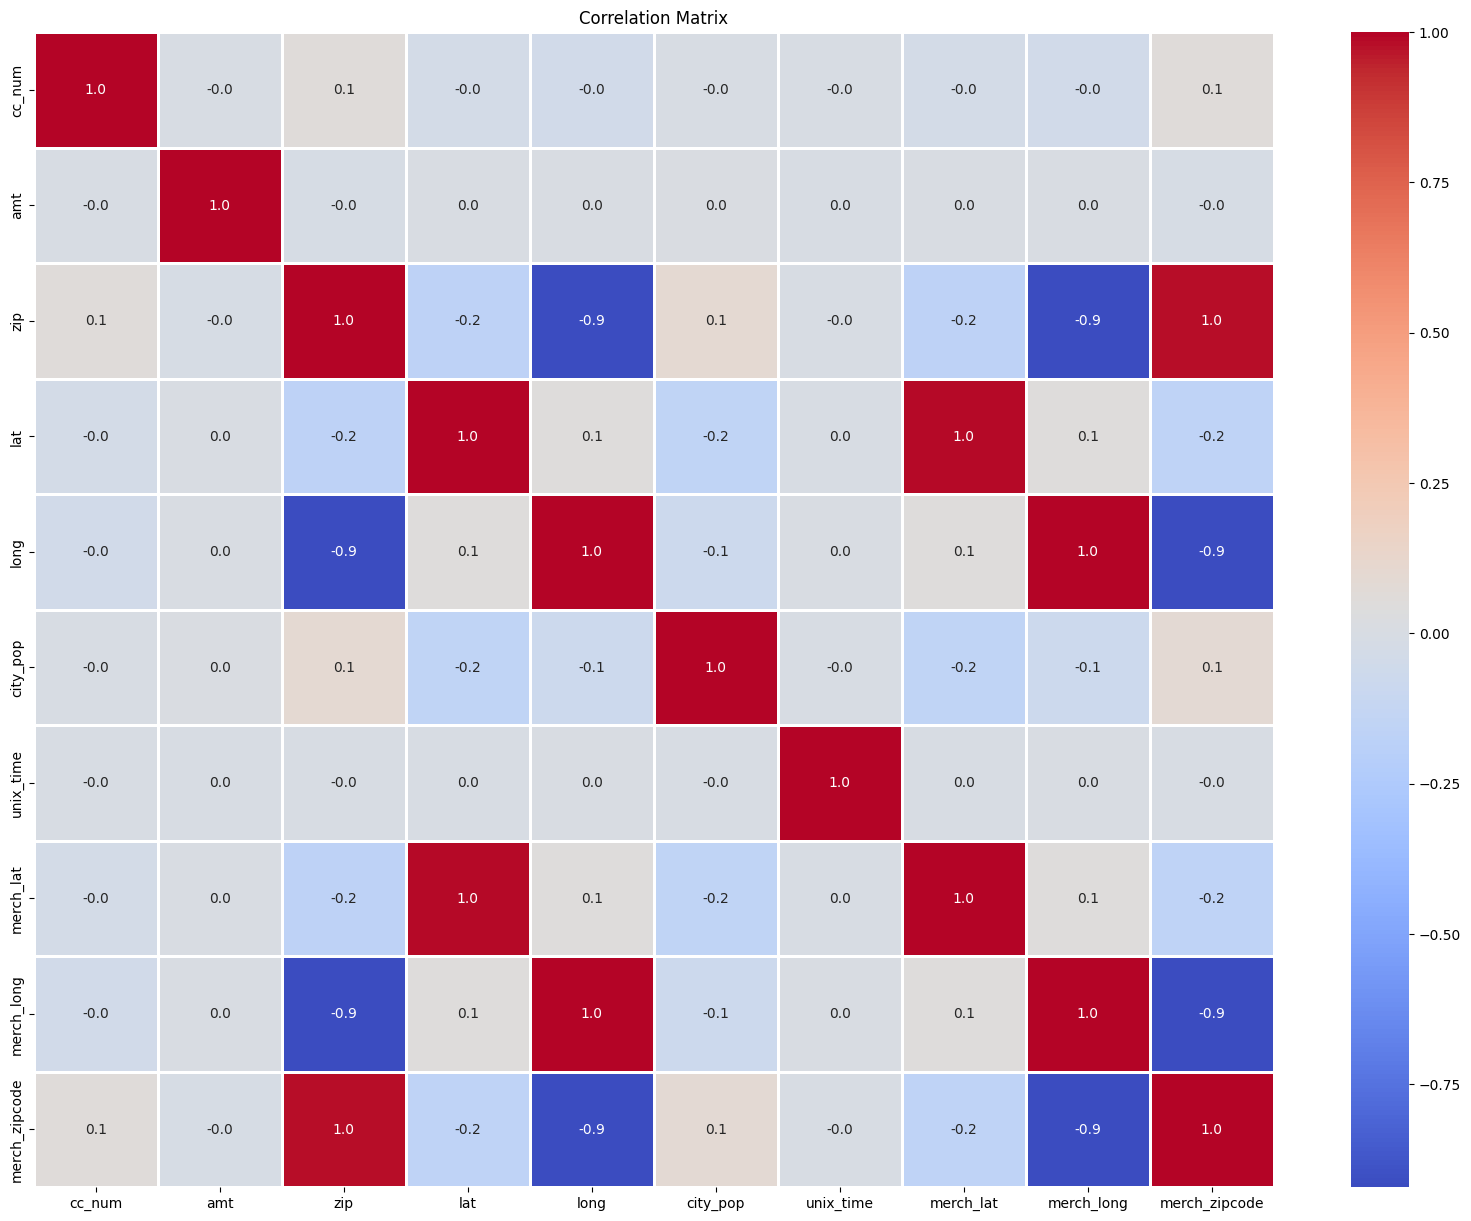

In [9]:
# create figure size
plt.figure(figsize=(20, 15))
# create heatmap plot
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=1, cmap='coolwarm', cbar=True)
# create title
plt.title('Correlation Matrix')
# show plot
plt.show()

<h2>Data Preprocessing And Normalization</h2>

In [10]:
# works out the columns that are of type category
categorical_cols = df.select_dtypes(include='category').columns.tolist()

# selects columns that are of type object
df_obj = df.select_dtypes(include='object')
# converts them to type category
df[df_obj.columns] = df_obj.apply(lambda x: x.astype('category'))

In [11]:
label_encoders = {}
for col in categorical_cols:
    # creates label encoder object
    le = LabelEncoder()
    # drops missing data to ensure label encoder can handle missing data
    df[col] = df[col].astype(str).dropna()
    # allows the label encoder to fit the data allowing it to learn different data
    df[col] = le.fit_transform(df[col])

In [12]:
# identifies all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
# create standard scalar object
scaler = StandardScaler()
# used to scale numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [14]:
# loops through the categorical columns
for col in df.select_dtypes(include='category').columns:
    # converts the categorical values into numerical representations of themselves
    df[col] = df[col].cat.codes

In [15]:
# displays info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84670 entries, 0 to 99998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  84670 non-null  int32  
 1   cc_num                 84670 non-null  float64
 2   merchant               84670 non-null  int32  
 3   category               84670 non-null  int32  
 4   amt                    84670 non-null  float64
 5   first                  84670 non-null  int16  
 6   last                   84670 non-null  int16  
 7   gender                 84670 non-null  int32  
 8   street                 84670 non-null  int16  
 9   city                   84670 non-null  int32  
 10  state                  84670 non-null  int32  
 11  zip                    84670 non-null  float64
 12  lat                    84670 non-null  float64
 13  long                   84670 non-null  float64
 14  city_pop               84670 non-null  float64
 15  job    

<h2>Split data into train, test and split</h2>

In [16]:
# drop the is fraud column and set in x dataframe
X = df.drop('is_fraud', axis=1)
# select only is fraud and set to y
y = df['is_fraud']

# split data using train test split from scikit learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# convert x train to a dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
# convert  test to dataframe
X_test = pd.DataFrame(X_test, columns=X.columns)

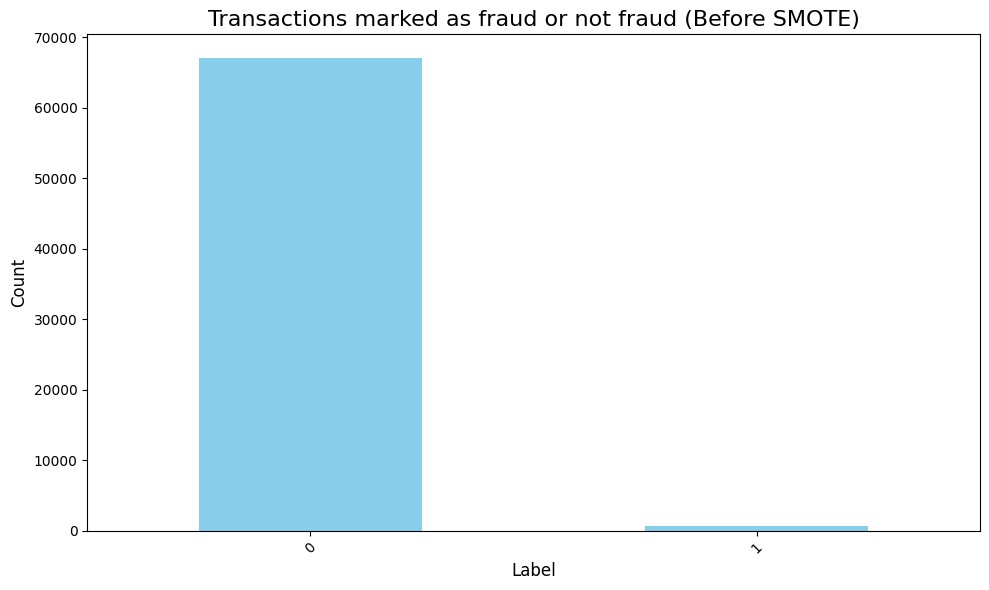

In [17]:
fraud_counts = y_train.value_counts()
fraud_counts = fraud_counts.sort_index()

plt.figure(figsize=(10, 6))
fraud_counts.plot(kind='bar', color='skyblue')

plt.title('Transactions marked as fraud or not fraud (Before SMOTE)', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# create standard scalar
scaler = StandardScaler()
# scale x_train
X_train_scaled = scaler.fit_transform(X_train)  
# scale_xtest
X_test_scaled = scaler.transform(X_test)

# create the smote class
smote = SMOTE(random_state=42, k_neighbors=2)
# resample the data using smote resample
X_train, y_train = smote.fit_resample(X_train_scaled, y_train)

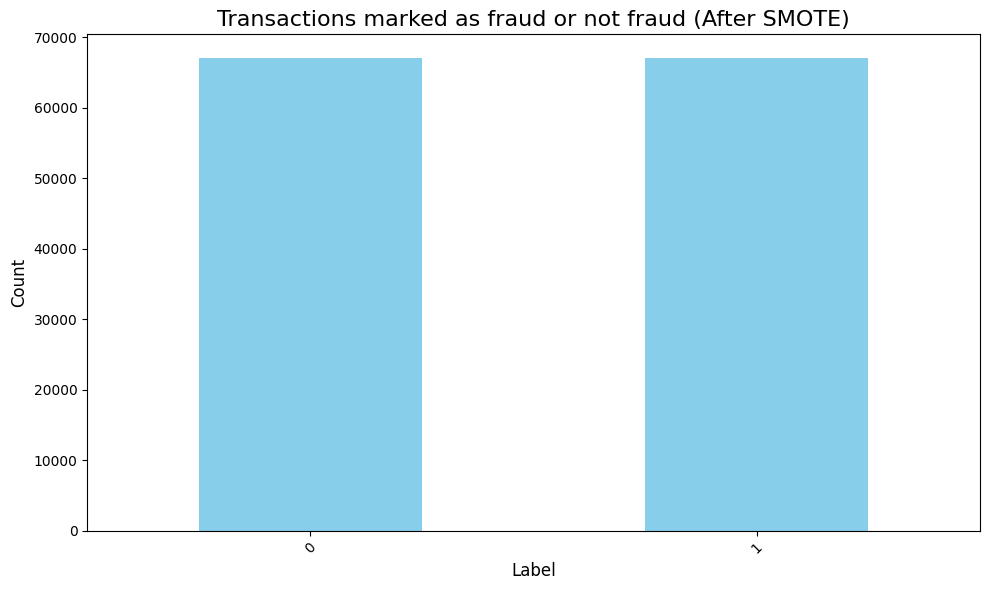

In [19]:
fraud_counts = y_train.value_counts()
fraud_counts = fraud_counts.sort_index()

plt.figure(figsize=(10, 6))
fraud_counts.plot(kind='bar', color='skyblue')

plt.title('Transactions marked as fraud or not fraud (After SMOTE)', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
clients = 5
client_data = []

samples = len(X_train) // clients

indices = np.arange(len(X_train))
np.random.shuffle(indices)

for i in range(clients):
    low = i * samples
    high = (i + 1) * samples if i < clients - 1 else len(X_train)
    client_i = indices[low:high]

    if hasattr(X_train, 'iloc'):
        client_X = X_train.iloc[client_i]
        client_y = y_train.iloc[client_i]
    else:
        client_X = X_train[client_i]
        client_y = y_train[client_i]
    
    client_data.append((client_X, client_y))

In [21]:
batch_size = 128
client_loaders = []


for client_X, client_y in client_data:
    
    if hasattr(client_X, 'values'):
        client_X = client_X.values
    if hasattr(client_y, 'values'):
        client_y = client_y.values

   
    X_tensor = torch.tensor(client_X, dtype=torch.float32)  
    y_tensor = torch.tensor(client_y, dtype=torch.float32)      

    
    dataset = TensorDataset(X_tensor, y_tensor)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    client_loaders.append(loader)




In [22]:
if hasattr(X_test, 'values'):
    X_test = X_test.values
if hasattr(y_test, 'values'):
    y_test = y_test.values

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32) 


test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [23]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim=22):
        super(SimpleMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),  
            nn.ReLU(),                    
            nn.Linear(128, 64),          
            nn.ReLU(),                    
            nn.Linear(64, 1)    
        )

    def forward(self, x):
        if x.dim() > 2:
            x = x.view(x.size(0), -1)
        return self.model(x)

In [24]:
class FraudNet(nn.Module):
    def __init__(self):
        super(FraudNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(22, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(32, 1)
        )



    def forward(self, x):
        return self.model(x).squeeze(1)  



In [25]:
class Conv1DNet(nn.Module):
    def __init__(self, input_dim=22):
        super(Conv1DNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.fc = nn.Sequential(
            nn.Linear(32 * input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)  
        )

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [48]:
input_size = 22  
hidden_size = 64

num_classes = len(set(y_train))  

global_model = Conv1DNet()

In [27]:
def hash_dataset(y_train):
    # Creates a hash to detect label flipping attacks.
    y_hash = hashlib.sha256(y_train.tobytes()).hexdigest()
    # returns the hash
    return y_hash

def check_labels(y_train, y_train_modified):
    # convert to array
    y_train_modified = np.array(y_train_modified)
    # convert to array
    y_train = np.array(y_train)
    # get original hash
    original_hash = hash_dataset(y_train)
    # get current hash
    current_hash = hash_dataset(y_train_modified)
    # check if hash is modified
    if original_hash != current_hash:
        print("Original Hash: ", original_hash)
        print("Current Hash: ", current_hash)
        print("Warning: Labels may have been tampered with!")
        return False
    
    print("Original Hash: ", original_hash)
    print("Current Hash: ", current_hash)
    return True

In [28]:
check_labels(y_train, y_train)

Original Hash:  c9047578fc0bc42843eac5084d2e35f98b236fbc7eddb0d76342e95ad1659511
Current Hash:  c9047578fc0bc42843eac5084d2e35f98b236fbc7eddb0d76342e95ad1659511


True

In [29]:
def train_local(model, train_loader, val_loader, criterion, optimizer, device):
    # start model training
    model.train()
    # loop training for 5 epochs
    for epoch in range(5):
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            # generate output
            output = model(X_batch)
            y_batch = y_batch.float().to(device)
            # calculate loss
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()


In [30]:
def encrypt_model_weights_hybrid(model_state_dict, public_key_rsa):
    # create but stream
    serialized_model = pickle.dumps(model_state_dict)
    
    # create aes key
    aes_key = get_random_bytes(16)
    # create aes cypher
    cipher_aes = AES.new(aes_key, AES.MODE_EAX)
    # cencrypt the text
    ciphertext, tag = cipher_aes.encrypt_and_digest(serialized_model)

    # apply rsa for asymetric encyrption
    cipher_rsa = PKCS1_OAEP.new(public_key_rsa)
    # generate rsa key
    encrypted_aes_key = cipher_rsa.encrypt(aes_key)
    
    # return components needed for decryption
    return {
        'encrypted_key': encrypted_aes_key,
        'nonce': cipher_aes.nonce,
        'tag': tag,
        'ciphertext': ciphertext
    }

In [31]:
def decrypt_model_weights_hybrid(encrypted_package, private_key):
    aes_key = cipher_rsa.decrypt(encrypted_package['encrypted_key'])
    cipher_aes = AES.new(aes_key, AES.MODE_EAX, nonce=encrypted_package['nonce'])
    serialized_model = cipher_aes.decrypt_and_verify(encrypted_package['ciphertext'], encrypted_package['tag'])
    model_state_dict = pickle.loads(serialized_model)
    return model_state_dict

In [ ]:
def train_client(client_id, global_model_state, dataset, device_type):
    """
    Trains a client model based on the global model state.
    Works with both FraudNet (multi-class) and SimpleMLP (binary 1-output).
    """
    model = type(global_model)()  
    

    model_dict = model.state_dict()
    pretrained_dict = {
        k: v for k, v in global_model_state.items()
        if k in model_dict and v.shape == model_dict[k].shape
    }
    model_dict.update(pretrained_dict)
    model.load_state_dict(model_dict)
    
    model.to(device_type)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    sample_X, _ = next(iter(torch.utils.data.DataLoader(dataset, batch_size=1)))
    model.eval()
    with torch.no_grad():
        out = model(sample_X.to(device_type))
    model.train()
    
    if out.dim() == 1 or (out.dim() == 2 and out.shape[1] == 1):
        criterion = nn.BCEWithLogitsLoss()
        binary_output = True
    else:
        criterion = nn.CrossEntropyLoss()
        binary_output = False
    
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
    
    model.train()
    for epoch in range(1):
        for X, y in dataloader:
            X = X.to(device_type)
            y = y.to(device_type)
            
            if binary_output:
                if out.dim() == 2 and out.shape[1] == 1:
                    y = y.unsqueeze(1).float()
                else:
                    y = y.float()
            else:
                if y.dim() > 1 and y.shape[1] > 1:
                    y = torch.argmax(y, dim=1)
                y = y.long()
            
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
    
    return model.state_dict()


In [33]:
def flatten_model_update(update_dict):
    return torch.cat([param.flatten() for param in update_dict.values()])

In [34]:
class FoolsGold:
    def __init__(self, num_clients):
        # set clients
        self.num_clients = num_clients
        # declare list for client memory
        self.client_memory = []
    
    def update_memory(self, client_grads):
        # add client gradients to client memory
        self.client_memory = client_grads

    def compute_weights(self):
        # compute the gradients
        grads = [g.view(-1) for g in self.client_memory] 
        # stack the gradients
        grads = torch.stack(grads)
        
        cosine_sim = F.cosine_similarity(grads.unsqueeze(1), grads.unsqueeze(0), dim=2)

        for i in range(self.num_clients):
            cosine_sim[i][i] = 0.0

        max_sim = torch.max(cosine_sim, dim=1)[0]
        weights = 1 - max_sim
        weights = F.softmax(weights, dim=0)
        return weights


In [35]:
def compute_cosine_trust_scores(client_weights, reference_weights):
    # creates reference vector
    ref_vec = flatten_model_update(reference_weights)
    # creates list for trust scores
    trust_scores = []
    
   # loops through client weights
    for cw in client_weights:
        # creates the clients vector
        client_vec = flatten_model_update(cw)
        # cacluates the cosine similarity
        cos_sim = F.cosine_similarity(client_vec.unsqueeze(0), ref_vec.unsqueeze(0))
        # appends similarity to trust scores
        trust_scores.append(cos_sim.item())
    
    # caclulates the total of the trust score
    total = sum(trust_scores)
    # caclulates the normalised trust score by dividing them by the total
    trust_scores = [score / total for score in trust_scores]
    
    # returns normalised trust scores
    return trust_scores

In [36]:
def aggregate_plain_weights(client_weights, model_template, trust_scores):
    # set aggragion dictionary
    aggregated = {}
    num_clients = len(client_weights)

    # calculate trust scores
    trust_scores = compute_cosine_trust_scores(client_weights, model_template.state_dict())

    # calculate weighted sum accross all clients
    for key in client_weights[0].keys():
        weighted_sum = sum([
            client_weights[i][key] * trust_scores[i] for i in range(num_clients)
        ])
        aggregated[key] = weighted_sum

    # update model with aggragated trust weighted parameters
    model_template.load_state_dict(aggregated)
    # return the model template
    return model_template


In [37]:
from torch.utils.data import Subset

def split_dataset(dataset, num_clients=5):
    total_size = len(dataset)
    client_datasets = []
    chunk_size = total_size // num_clients
    for i in range(num_clients):
        start = i * chunk_size
        end = (i + 1) * chunk_size if i != num_clients - 1 else total_size
        client_datasets.append(Subset(dataset, list(range(start, end))))
    return client_datasets

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            outputs = model(X_batch)

            # Handle binary vs multi-class
            if outputs.dim() == 1:
                # Binary, 1D output
                preds = (torch.sigmoid(outputs) > 0.5).long()
            elif outputs.dim() == 2 and outputs.shape[1] == 1:
                # Binary, 2D output
                preds = (torch.sigmoid(outputs).squeeze(1) > 0.5).long()
            else:
                # Multi-class
                preds = torch.argmax(outputs, dim=1)

            # If y_batch is one-hot, convert to class index
            if y_batch.dim() > 1 and y_batch.shape[1] > 1:
                y_batch = torch.argmax(y_batch, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    return acc, prec, rec, f1



In [39]:
# List of rounds to test
round_options = [3, 5, 7]
all_results = {}

for num_rounds in round_options:
    print(f"\n===== Federated Training for {num_rounds} Rounds =====")

    # Reset the global model for each experiment
    global_model.apply(lambda m: m.reset_parameters() if hasattr(m, "reset_parameters") else None)
    client_datasets = split_dataset(dataset)

    attack_acc_list, attack_prec_list, attack_rec_list, attack_f1_list = [], [], [], []
    val_acc_list, val_prec_list, val_rec_list, val_f1_list = [], [], [], []
    trust_score_history = [[] for _ in range(clients)]

    for round_idx in range(num_rounds):
        print(f"\n===== Federated Round {round_idx + 1} =====")

        global_model_state = {k: v.cpu() for k, v in global_model.state_dict().items()}

        # Train clients in parallel
        with ThreadPoolExecutor(max_workers=clients) as executor:
            futures = [
                executor.submit(train_client, i, global_model_state, client_datasets[i], device.type)
                for i in range(clients)
            ]
            client_weights = [f.result() for f in as_completed(futures) if f.result() is not None]

        # Inject malicious noise into one client's weights
        malicious_index = randint(0, len(client_weights) - 1)
        for key in client_weights[malicious_index]:
            if client_weights[malicious_index][key].dtype.is_floating_point:
                noise = torch.randn_like(client_weights[malicious_index][key]) * 15.0
                client_weights[malicious_index][key] += noise

        # Compute client gradients for trust scoring
        global_state = global_model.state_dict()
        client_grads = [
            torch.cat([v.view(-1) for v in {k: w[k] - global_state[k] for k in w}.values()])
            for w in client_weights
        ]

        fg = FoolsGold(num_clients=len(client_grads))
        fg.update_memory(client_grads)
        trust_scores = fg.compute_weights()

        for i, score in enumerate(trust_scores):
            trust_score_history[i].append(score.item())

        # Identify and remove the least trustworthy client
        min_index = trust_scores.tolist().index(min(trust_scores.tolist()))
        filtered_weights = [w for i, w in enumerate(client_weights) if i != min_index]
        filtered_scores = [s for i, s in enumerate(trust_scores) if i != min_index]

        # Create a completely separate poisoned model
        poisoned_model = copy.deepcopy(global_model)
        poisoned_model = aggregate_plain_weights(client_weights, poisoned_model, trust_scores)

        # Defended global model
        global_model = aggregate_plain_weights(filtered_weights, global_model, filtered_scores)


        # Evaluation
        full_loader = DataLoader(dataset, batch_size=128, shuffle=False)
        attack_acc, attack_prec, attack_rec, attack_f1 = evaluate_model(poisoned_model, full_loader, device)
        val_acc, val_prec, val_rec, val_f1 = evaluate_model(global_model, full_loader, device)

        # Store metrics
        attack_acc_list.append(attack_acc)
        attack_prec_list.append(attack_prec)
        attack_rec_list.append(attack_rec)
        attack_f1_list.append(attack_f1)

        val_acc_list.append(val_acc)
        val_prec_list.append(val_prec)
        val_rec_list.append(val_rec)
        val_f1_list.append(val_f1)

        print(f"Round {round_idx + 1} Results:")
        print(f"  Poisoned Model -> Precision = {attack_prec:.4f}, Accuracy = {attack_acc:.2f}")
        print(f"  Defended Model -> Precision = {val_prec:.4f}, Accuracy = {val_acc:.2f}")

    all_results[num_rounds] = {
        "attack_acc": attack_acc_list,
        "attack_prec": attack_prec_list,
        "attack_rec": attack_rec_list,
        "attack_f1": attack_f1_list,
        "val_acc": val_acc_list,
        "val_prec": val_prec_list,
        "val_rec": val_rec_list,
        "val_f1": val_f1_list,
        "trust_scores": trust_score_history
    }

# Summary printout
for rounds, results in all_results.items():
    print(f"\n=== Summary for {rounds} Rounds ===")
    for r in range(rounds):
        print(f"Round {r+1}: Poisoned Acc={results['attack_acc'][r]:.2f}, "
              f"Prec={results['attack_prec'][r]:.4f} | "
              f"Defended Acc={results['val_acc'][r]:.2f}, "
              f"Prec={results['val_prec'][r]:.4f}")



===== Federated Training for 3 Rounds =====

===== Federated Round 1 =====
Round 1 Results:
  Poisoned Model -> Precision = 0.8776, Accuracy = 0.87
  Defended Model -> Precision = 0.8775, Accuracy = 0.86

===== Federated Round 2 =====
Round 2 Results:
  Poisoned Model -> Precision = 0.8796, Accuracy = 0.87
  Defended Model -> Precision = 0.8788, Accuracy = 0.87

===== Federated Round 3 =====
Round 3 Results:
  Poisoned Model -> Precision = 0.8986, Accuracy = 0.90
  Defended Model -> Precision = 0.9003, Accuracy = 0.90

===== Federated Training for 5 Rounds =====

===== Federated Round 1 =====
Round 1 Results:
  Poisoned Model -> Precision = 0.8731, Accuracy = 0.86
  Defended Model -> Precision = 0.8687, Accuracy = 0.85

===== Federated Round 2 =====
Round 2 Results:
  Poisoned Model -> Precision = 0.8789, Accuracy = 0.87
  Defended Model -> Precision = 0.8714, Accuracy = 0.85

===== Federated Round 3 =====
Round 3 Results:
  Poisoned Model -> Precision = 0.8807, Accuracy = 0.88
  Defe

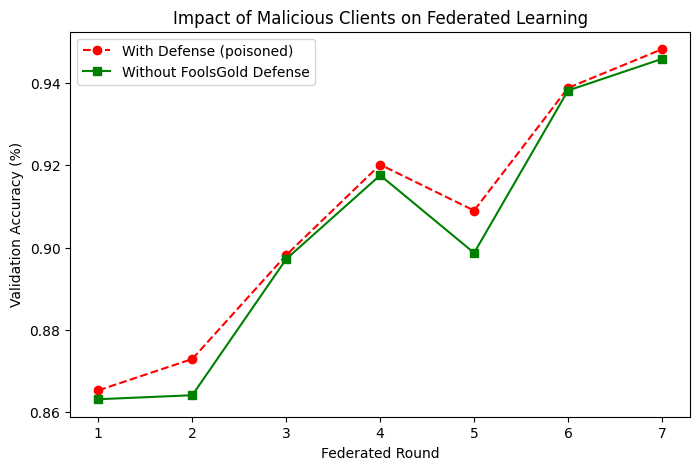

In [40]:
plt.figure(figsize=(8,5))
plt.plot(range(1, num_rounds+1), attack_acc_list, "r--o", label="With Defense (poisoned)")
plt.plot(range(1, num_rounds+1), val_acc_list, "g-s", label="Without FoolsGold Defense")
plt.xlabel("Federated Round")
plt.ylabel("Validation Accuracy (%)")
plt.title("Impact of Malicious Clients on Federated Learning")
plt.legend()
plt.show()

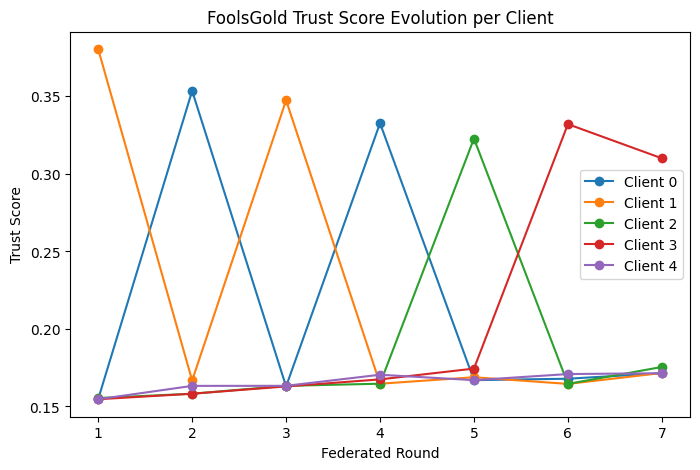

In [41]:
plt.figure(figsize=(8,5))
for i, scores in enumerate(trust_score_history):
    plt.plot(range(1, len(scores)+1), scores, marker="o", label=f"Client {i}")
plt.xlabel("Federated Round")
plt.ylabel("Trust Score")
plt.title("FoolsGold Trust Score Evolution per Client")
plt.legend()
plt.show()

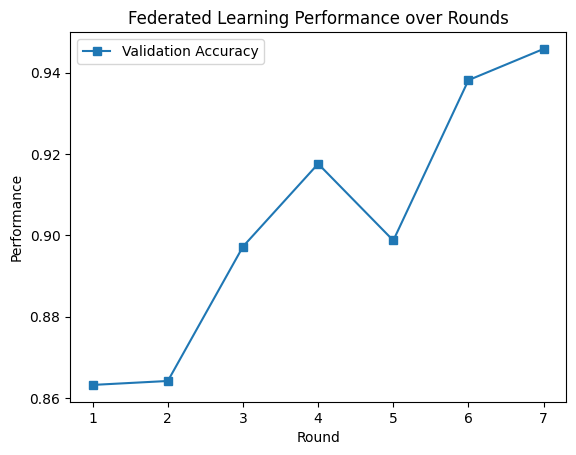

In [42]:
#plt.plot(range(1, num_rounds+1), val_prec_list, marker='o', label="Validation Precision")
plt.plot(range(1, num_rounds+1), val_acc_list, marker='s', label="Validation Accuracy")
plt.xlabel("Round")
plt.ylabel("Performance")
plt.legend()
plt.title("Federated Learning Performance over Rounds")
plt.show()

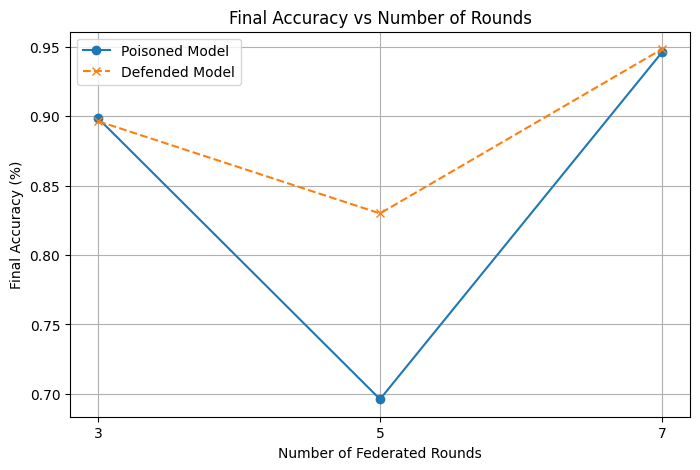

In [43]:
round_options = [3, 5, 7]

# Extract final accuracies for each number of rounds
final_val_acc = [all_results[r]['val_acc'][-1] for r in round_options]
final_attack_acc = [all_results[r]['attack_acc'][-1] for r in round_options]

plt.figure(figsize=(8,5))
plt.plot(round_options, final_val_acc, marker='o', label="Poisoned Model")
plt.plot(round_options, final_attack_acc, marker='x', linestyle='--', label="Defended Model")

plt.xlabel("Number of Federated Rounds")
plt.ylabel("Final Accuracy (%)")
plt.title("Final Accuracy vs Number of Rounds")
plt.xticks(round_options)
plt.grid(True)
plt.legend()
plt.show()


In [44]:
print("Evaluating global model on test set...")
acc, prec, rec, f1 = evaluate_model(global_model, loader, device)
print(f"Accuracy:  {acc * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall:    {rec * 100:.2f}%")
print(f"F1-score:  {f1 * 100:.2f}%\n")

Evaluating global model on test set...
Accuracy:  94.58%
Precision: 94.59%
Recall:    94.58%
F1-score:  94.58%



In [45]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model_with_confusion_heatmap(model, dataloader, device, class_names=None, threshold=0.5):
    model.eval()
    model.to(device)
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).squeeze()  # convert to probabilities
            
            preds = (probs > threshold).long()  # apply threshold
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.show()
    

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.24      0.38     13511
       Fraud       0.56      1.00      0.72     13323

    accuracy                           0.62     26834
   macro avg       0.78      0.62      0.55     26834
weighted avg       0.78      0.62      0.55     26834



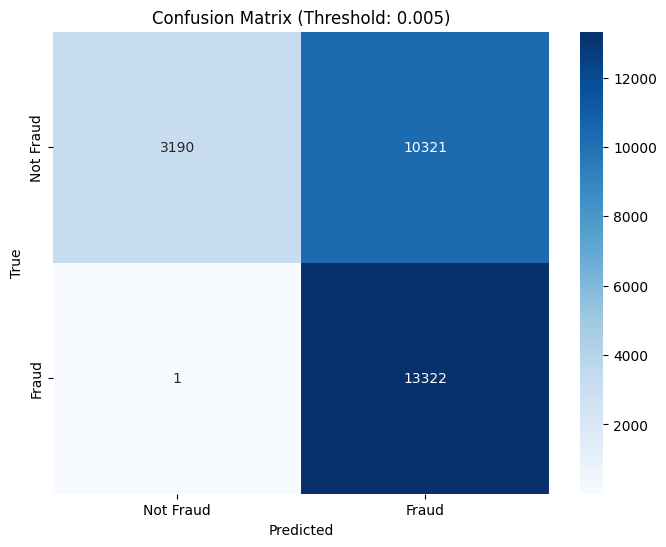

In [46]:
evaluate_model_with_confusion_heatmap(
    model=global_model,
    dataloader=loader,
    device=device,
    class_names=["Not Fraud", "Fraud"],
    threshold=0.005
)



In [47]:
torch.save(global_model, "global_model.pt")